## Importing Important Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import StackingClassifier

### Initializing essential objects for label encoding, text tokenization and preprocessing, stemming, word cloud generation, text vectorization, and Naive Bayes classifiers, along with a stacking classifier.


In [90]:
encoder = LabelEncoder()
nltk.download('punkt')
nltk.download('stopwords')
ps = PorterStemmer()
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
cv = CountVectorizer()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
tfidf = TfidfVectorizer()
clf = StackingClassifier(estimators=[('gnb',gnb),('mnb',mnb),('bnb',bnb)],final_estimator=mnb)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading the CSV file

In [91]:
df = pd.read_csv('spam.csv' , encoding='latin-1')

In [92]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [93]:
df.shape

(5572, 5)

# Task to do in this dataset.
## 1. Data Cleaning
## 2. Exploratory data analysis (EDA)
## 3. Text Preprocessing
## 4. Model Building
## 5. Evaluation
## 6. IMprovement

## 1. Data Cleaning

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [95]:
# Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [96]:
df.sample(5)

,v1,v2
829,ham,Thanks for yesterday sir. You have been wonder...
1372,ham,1) Go to write msg 2) Put on Dictionary mode 3...
2922,ham,Fine am simply sitting.
604,ham,Meet after lunch la...
4299,ham,Erm... Woodland avenue somewhere. Do you get t...


In [97]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Encoding the 'target' column in the DataFrame using the previously initialized LabelEncoder object.


In [98]:
df['target'] = encoder.fit_transform(df['target'])

In [99]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [101]:
# check for duplicate values
df.duplicated().sum()

403

In [102]:
df = df.drop_duplicates(keep='first')

In [103]:
df.shape

(5169, 2)

In [104]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory data analysis (EDA)

In [105]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

### Creating a pie chart to visualize the distribution of 'ham' and 'spam' labels in the DataFrame.


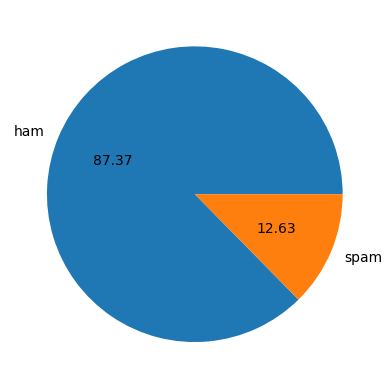

In [106]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [107]:
# number of character
df['num_characters'] = df['text'].apply(len)

In [108]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [109]:
# number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [110]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [111]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [112]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [113]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Creating a histogram to compare the distribution of the number of characters in 'ham' (blue) and 'spam' (red) messages.


<Axes: xlabel='num_characters', ylabel='Count'>

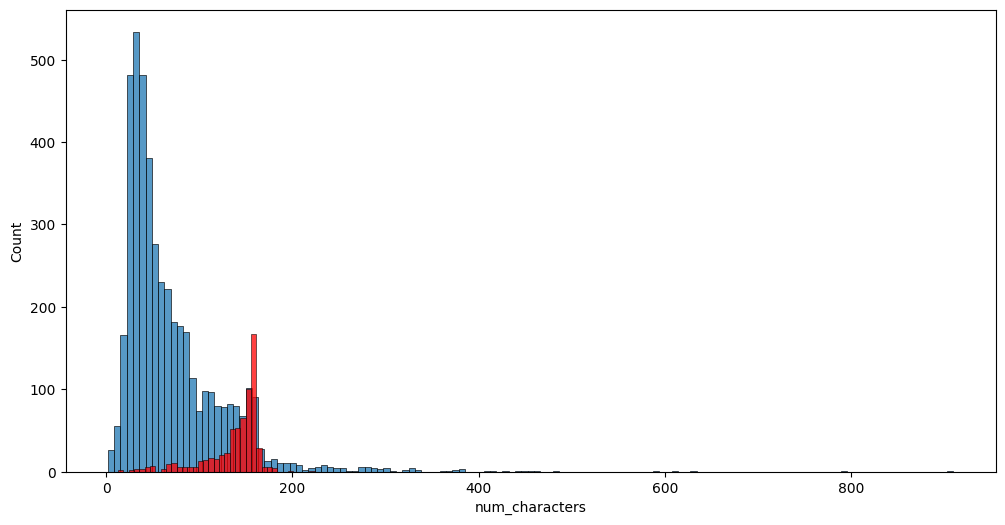

In [114]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

### Creating a histogram to compare the distribution of the number of words in 'ham' (blue) and 'spam' (red) messages.


<Axes: xlabel='num_words', ylabel='Count'>

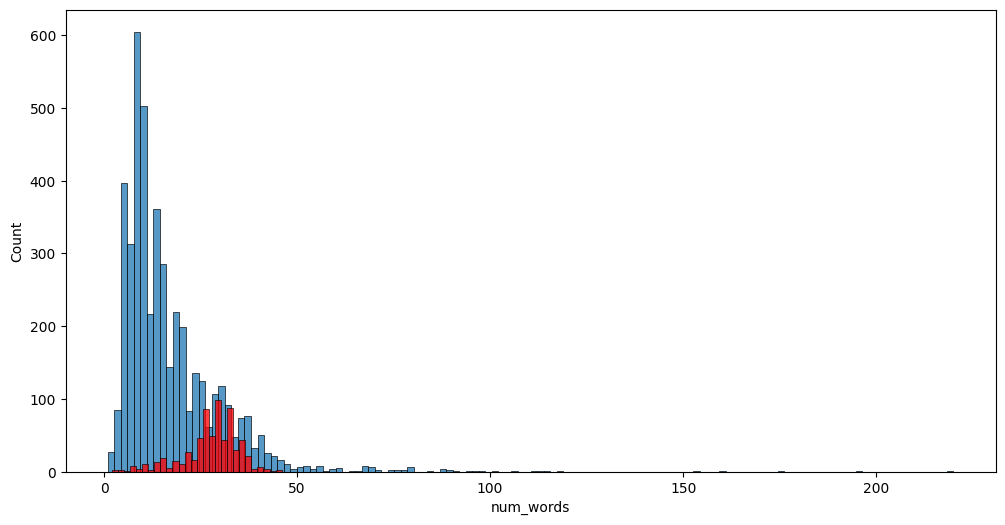

In [115]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

### Creating a pairplot to visualize pairwise relationships between different features in the DataFrame, with the hue set to 'target' for distinguishing between 'ham' and 'spam' messages.


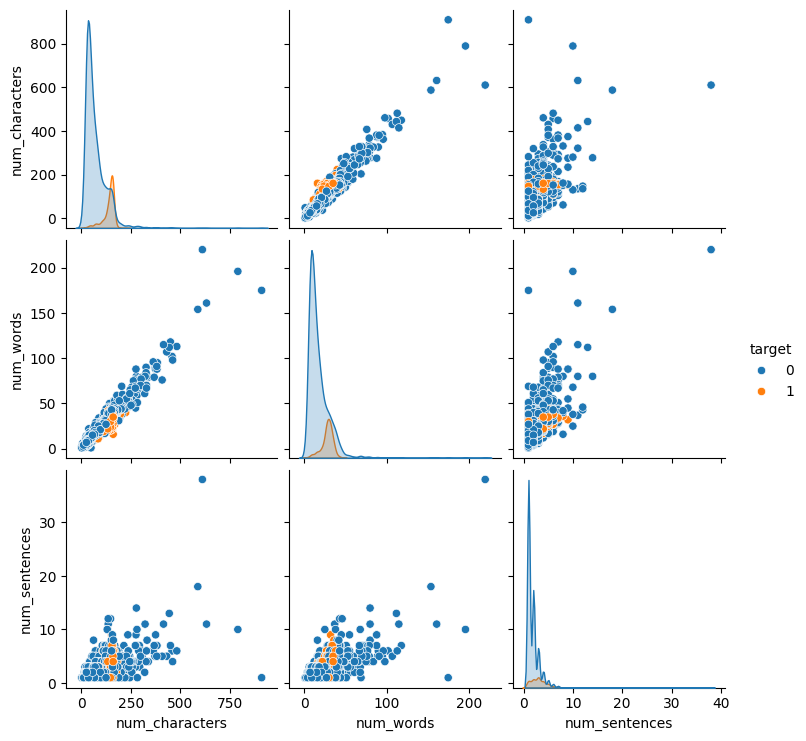

In [116]:
sns.pairplot(df,hue='target')

## Data Preprocessing
*   Lowercase
*   Tokenization
*   Removing Special Character
*   Stemming



### Function to preprocess text data:
####   - Converts text to lowercase
####   - Tokenizes the text
####   - Removes non-alphanumeric characters
####   - Removes stopwords and punctuation
####   - Stems the remaining words using Porter stemmer
### Returns the preprocessed text as a string.


In [117]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


### Applying the 'transform_text' function to preprocess the 'text' column in the DataFrame and storing the preprocessed text in a new column 'transformed_text'.


In [118]:
df['transformed_text'] = df['text'].apply(transform_text)

In [119]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Generating a word cloud for spam messages by concatenating the preprocessed text from the 'transformed_text' column of the DataFrame where the 'target' is equal to 1


In [120]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

### Displaying the word cloud for spam messages with a specified figure size.


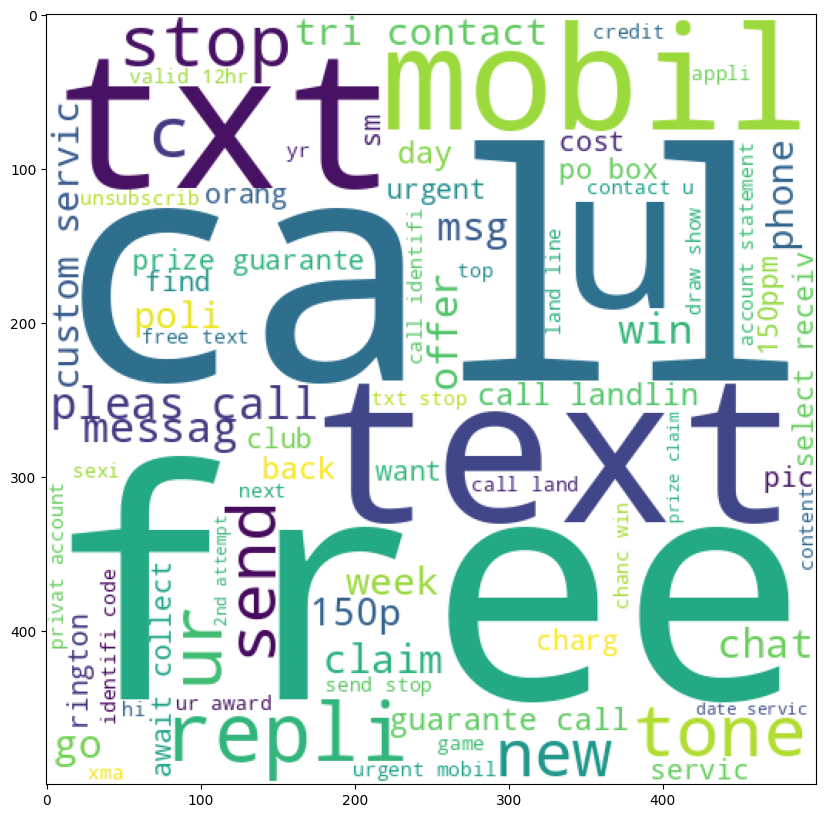

In [121]:
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

### Generating a word cloud for ham messages by concatenating the preprocessed text from the 'transformed_text' column of the DataFrame where the 'target' is equal to 0

In [122]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

### Displaying the word cloud for ham messages with a specified figure size.


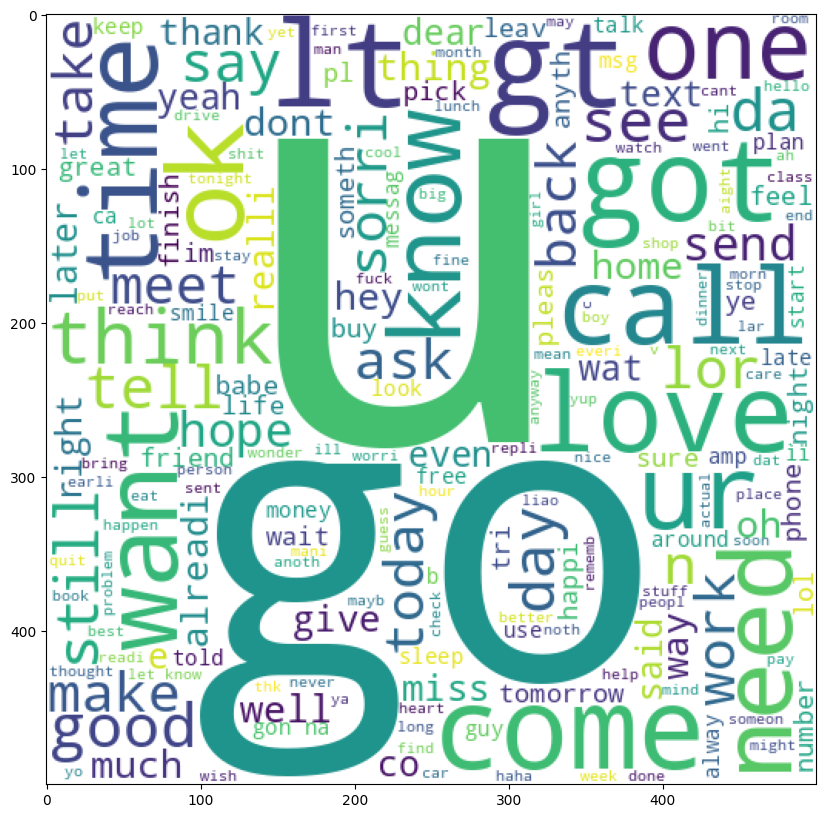

In [123]:
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)

### Creating a corpus of words from spam messages by iterating through each preprocessed message in the DataFrame where the 'target' is equal to 1 and splitting the message into words.


In [124]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [125]:
len(spam_corpus)

9939

### counting the most common words

In [126]:
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [127]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


### Creating a bar plot to visualize the 30 most common words in spam messages using their frequencies, where the x-axis represents the words and the y-axis represents their frequencies.


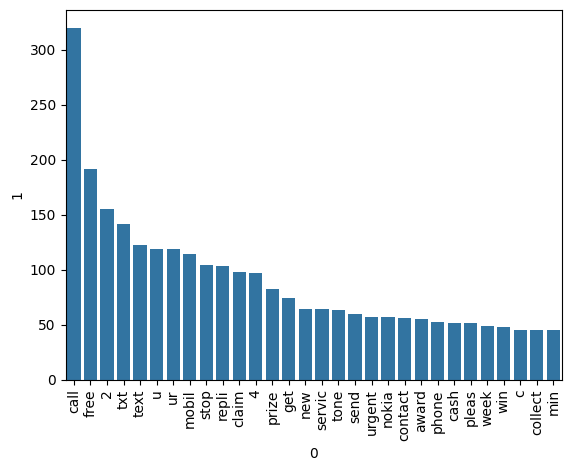

In [128]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Creating a corpus of words from ham messages by iterating through each preprocessed message in the DataFrame where the 'target' is equal to 0 and splitting the message into words.


In [129]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].to_list():
  for word in msg.split():
    ham_corpus.append(word)

In [130]:
len(ham_corpus)

35404

In [131]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [132]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


### Creating a bar plot to visualize the 30 most common words in ham messages using their frequencies, where the x-axis represents the words and the y-axis represents their frequencies.


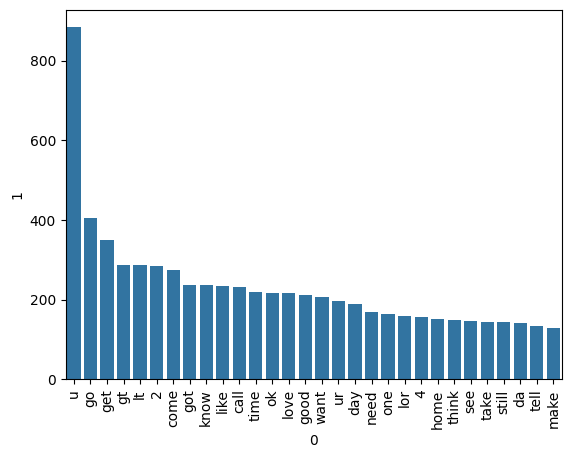

In [133]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building



1.   Using CountVectorizer




### Transforming the preprocessed text data into a bag-of-words representation using CountVectorizer and converting it into a numpy array.


In [134]:
x = cv.fit_transform(df['transformed_text']).toarray()


In [135]:
x.shape

(5169, 6708)

In [136]:
y = df['target'].values

In [137]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Splitting the data into training and testing sets with 80% for training and 20% for testing, while maintaining the same random state for reproducibility.


In [138]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Fitting the Gaussian Naive Bayes model on the training data, making predictions on the testing data, and evaluating the model's performance using accuracy, confusion matrix, and precision score.


In [139]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


### Fitting the MultiNomial Naive Bayes model on the training data, making predictions on the testing data, and evaluating the model's performance using accuracy, confusion matrix, and precision score.


In [140]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


### Fitting the Bernoulli Naive Bayes model on the training data, making predictions on the testing data, and evaluating the model's performance using accuracy, confusion matrix, and precision score.


In [141]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


2. Using TfidfVectorizer

### Transforming the preprocessed text data into a TF-IDF representation using TfidfVectorizer and converting it into a numpy array.


In [142]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [143]:
x.shape

(5169, 6708)

In [144]:
y = df['target'].values

### Splitting the data into training and testing sets with 80% for training and 20% for testing, while maintaining the same random state for reproducibility.

In [145]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

### Fitting the Gaussian Naive Bayes model on the training data, making predictions on the testing data, and evaluating the model's performance using accuracy, confusion matrix, and precision score.


In [146]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


### Fitting the Multinomial Naive Bayes model on the training data, making predictions on the testing data, and evaluating the model's performance using accuracy, confusion matrix, and precision score.


In [147]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


### Fitting the Bernoulli Naive Bayes model on the training data, making predictions on the testing data, and evaluating the model's performance using accuracy, confusion matrix, and precision score.


In [148]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### Fitting the Stacking Classifier model on the training data, making predictions on the testing data, and evaluating the model's performance using accuracy, confusion matrix, and precision score.


In [149]:
clf.fit(x_train,y_train)
y_pred4 = clf.predict(x_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9671179883945842
[[893   3]
 [ 31 107]]
0.9727272727272728


### Function to convert numerical predictions into labels and predicting the label for an input email using a Multinomial Naive Bayes classifier trained on TF-IDF features.


In [157]:
def predict_label(prediction):
    if prediction == 0:
        return "ham"
    elif prediction == 1:
        return "spam"
    else:
        return "Unknown label"

input_mail = ["U dun say so early hor... U c already then say..."]
input_data_feature = tfidf.transform(input_mail).toarray()
prediction = mnb.predict(input_data_feature)[0]
predicted_label = predict_label(prediction)

print("Predicted label:", predicted_label)


Predicted label: ham


### Function to convert numerical predictions into labels and predicting the label for an input email using aStacking Classifier trained on TF-IDF features.


In [163]:
def predict_label(prediction):
    if prediction == 0:
        return "ham"
    elif prediction == 1:
        return "spam"
    else:
        return "Unknown label"

input_mail = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
input_data_feature = tfidf.transform(input_mail).toarray()
prediction = clf.predict(input_data_feature)[0]
predicted_label = predict_label(prediction)

print("Predicted label:", predicted_label)

Predicted label: spam
